# Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype 

In [3]:
# View more columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Reading the dataset of application.
app_data = pd.read_csv("application_data.csv")

In [5]:
# Display Dataframe.
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Concise summary of Dataframe.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Statistical summary of Dataframe.
app_data.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
# Dimension of dataframe.
app_data.shape

(307511, 122)

<h3> Data Quality check and Missing values </h3>

In [9]:
# Remove Unwanted columns.
Unwanted = ["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE",
            "FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY",
            "REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
            "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","DAYS_LAST_PHONE_CHANGE",
            "FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
            "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9",
            "FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
            "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17", 
            "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

app_data.drop(columns=Unwanted, axis=1, inplace=True)

In [10]:
# Dimension of the DataFrame
app_data.shape

(307511, 87)

<h4> Remove columns with high missing percentage </h4>

In [11]:
# Percentage of Null-values.
Null_data = (app_data.isnull().sum()/app_data.shape[0]) * 100

# Columns with Null-values greater than 50%
Null_data[Null_data.values > 50]

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [12]:
# Convert columns to a List.
Null_cols = list((Null_data[Null_data.values > 50]).index)


# Drop the Unwanted columns from the DataFrame.
app_data.drop(Null_cols, axis=1, inplace=True)

In [13]:
# Dimension of the DataFrame.
app_data.shape

(307511, 46)

<h4> Impute missing values </h4>

In [14]:
# Check the percentage of null-values in DataFrame.
(app_data.isnull().sum() / app_data.shape[0] * 100).sort_values()

SK_ID_CURR                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_BIRTH                       0.000000
REGION_POPULATION_RELATIVE       0.000000
NAME_HOUSING_TYPE                0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
WEEKDAY_APPR_PROCESS_START       0.000000
DAYS_REGISTRATION                0.000000
HOUR_APPR_PROCESS_START          0.000000
AMT_CREDIT                       0.000000
AMT_INCOME_TOTAL                 0.000000
CNT_CHILDREN                     0.000000
FLAG_OWN_REALTY                  0.000000
FLAG_OWN_CAR                     0.000000
CODE_GENDER                      0.000000
NAME_CONTRACT_TYPE               0.000000
TARGET                           0.000000
ORGANIZATION_TYPE                0.000000
DAYS_ID_PUBLISH                  0.000000
CNT_FAM_MEMBERS                  0.000650
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0

<!--  --> Imputation for columns with less null-value percentage(<i>Close to 13%</i>)

In [15]:
# Display all columns with null percent less than 13%
Null_col = app_data.isnull().sum() / app_data.shape[0] * 100
Null_col[(Null_col>0) & (Null_col<14)]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [16]:
# Concise summary of columns with null-values closer to 13%
app_data[["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
          "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
          "AMT_REQ_CREDIT_BUREAU_QRT" , "AMT_REQ_CREDIT_BUREAU_YEAR"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [17]:
# Check the number of unique values for attributes with null-percent closest to 13%
print("AMT_REQ_CREDIT_BUREAU_HOUR = ",app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].nunique())
print("AMT_REQ_CREDIT_BUREAU_DAY  = ",app_data["AMT_REQ_CREDIT_BUREAU_DAY" ].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK = ",app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON  = ",app_data["AMT_REQ_CREDIT_BUREAU_MON" ].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT  = ",app_data["AMT_REQ_CREDIT_BUREAU_QRT" ].nunique())
print("AMT_REQ_CREDIT_BUREAU_YEAR = ",app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].nunique())

AMT_REQ_CREDIT_BUREAU_HOUR =  5
AMT_REQ_CREDIT_BUREAU_DAY  =  9
AMT_REQ_CREDIT_BUREAU_WEEK =  9
AMT_REQ_CREDIT_BUREAU_MON  =  24
AMT_REQ_CREDIT_BUREAU_QRT  =  11
AMT_REQ_CREDIT_BUREAU_YEAR =  25


In [18]:
# Ratio of unique-values to length of data.
'''Unique-values present in their respective columns are not significant. 
There by we infer that above columns can be into categorical-variable. 
Hence, Null-values are replaced with mode and datatype is changed accordingly.'''

print("AMT_REQ_CREDIT_BUREAU_HOUR = ",round(app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].nunique()/len(app_data)*100, 4))
print("AMT_REQ_CREDIT_BUREAU_DAY  = ",round(app_data["AMT_REQ_CREDIT_BUREAU_DAY" ].nunique()/len(app_data)*100, 4))
print("AMT_REQ_CREDIT_BUREAU_WEEK = ",round(app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].nunique()/len(app_data)*100, 4))
print("AMT_REQ_CREDIT_BUREAU_MON  = ",round(app_data["AMT_REQ_CREDIT_BUREAU_MON" ].nunique()/len(app_data)*100, 4))
print("AMT_REQ_CREDIT_BUREAU_QRT  = ",round(app_data["AMT_REQ_CREDIT_BUREAU_QRT" ].nunique()/len(app_data)*100, 4))
print("AMT_REQ_CREDIT_BUREAU_YEAR = ",round(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].nunique()/len(app_data)*100, 4))

AMT_REQ_CREDIT_BUREAU_HOUR =  0.0016
AMT_REQ_CREDIT_BUREAU_DAY  =  0.0029
AMT_REQ_CREDIT_BUREAU_WEEK =  0.0029
AMT_REQ_CREDIT_BUREAU_MON  =  0.0078
AMT_REQ_CREDIT_BUREAU_QRT  =  0.0036
AMT_REQ_CREDIT_BUREAU_YEAR =  0.0081


In [19]:
# Mode for number of enquiries to Credit Bureau about the client one hour before application.
print("Mode_HOUR = ",app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0])

# Mode for number of enquiries to Credit Bureau about the client one day before application.
print("Mode_DAY  = ",app_data["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0])

# Mode for number of enquiries to Credit Bureau about the client one hour before application.
print("Mode_WEEK = ",app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0])

# Mode for number of enquiries to Credit Bureau about the client one month before application.
print("Mode_MON  = ",app_data["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0])

# Mode for number of enquiries to Credit Bureau about the client 3 months before application.
print("Mode_QRT  = ",app_data["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0])

# Mode for number of enquiries to Credit Bureau about the client one year before application.
print("Mode_YEAR = ",app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0])

Mode_HOUR =  0.0
Mode_DAY  =  0.0
Mode_WEEK =  0.0
Mode_MON  =  0.0
Mode_QRT  =  0.0
Mode_YEAR =  0.0


In [20]:
# Convert null-values for attributes.
'''All the above data attributes possess 0 as mode. Hence, fill NAN values with 0.'''

app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0, inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0, inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_MON" ].fillna(0, inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_DAY" ].fillna(0, inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_QRT" ].fillna(0, inplace=True)
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0, inplace=True)

<!--  --> Imputation for columns with null-value percentage less than 13%

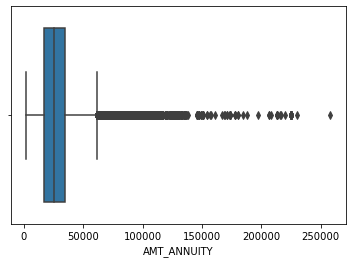

In [21]:
# Boxplot to check outlier.
'''Boxplot depicts that it contains an outlier. Hence,"mean" is not best way to replace null-values.'''

sns.boxplot(app_data["AMT_ANNUITY"])
plt.show()

MEAN   = 27108.57
MEDIAN = 24903.0


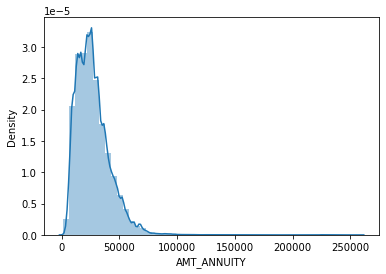

In [22]:
# Statistical values of the column,"AMT_ANNUITY".
'''Distributed-plot is positively-skewed with Median is greater than Mean. 
Hence, the best way to replace null-values is to use median.'''

mean = round(app_data["AMT_ANNUITY"].mean(),2)
med  = app_data["AMT_ANNUITY"].median()
print(f"MEAN   = {mean}")
print(f"MEDIAN = {med}")

# Visualize the data.
sns.distplot(app_data["AMT_ANNUITY"])
plt.show()

In [23]:
# Replace null-values with its median.
app_data["AMT_ANNUITY"].fillna(med, inplace=True)

<B>NOTE:</B> We have attributes with the value "XNA" which means "Not Available". So we have to use suitable techniques on those attributes to fill those missing values or to delete them.

3.4 Replace values for attributes having null-value as "XNA"

In [24]:
# Analysis of Gender column.
''' About 65% of data contains female gender. Hence,impute the missing values with Female.'''
app_data["CODE_GENDER"].value_counts(normalize=True) *100

# Replace the null-values with mode of the data
app_data["CODE_GENDER"] = app_data["CODE_GENDER"].replace("XNA","F")

In [25]:
# Percent of XNA values in orgaization column.
XNA = app_data[app_data["ORGANIZATION_TYPE"] == "XNA"].shape[0]
XNA_Percent = app_data[app_data["ORGANIZATION_TYPE"] == "XNA"].shape[0]/len(app_data) *100
print(f"No. of XNA rows = {XNA}")
print(f"Percentage of XNA values = {round(XNA_Percent,2)}%")

# Describing the organization column.
app_data["ORGANIZATION_TYPE"].describe()

No. of XNA rows = 55374
Percentage of XNA values = 18.01%


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

<b>Inference:</b>The Organization column has 18% XNA values. Removing those 55,374 rows from our dataset may affect the analysis.

<h4> Check the DataType of all the columns</h4>

In [26]:
categorical_cols = ["TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY", 
                    "AMT_REQ_CREDIT_BUREAU_HOUR","NAME_HOUSING_TYPE","NAME_HOUSING_TYPE",
                    "WEEKDAY_APPR_PROCESS_START","NAME_TYPE_SUITE","NAME_INCOME_TYPE",
                    "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","DEF_60_CNT_SOCIAL_CIRCLE",
                    "DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_QRT","OCCUPATION_TYPE",
                    "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR",
                    "OBS_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","ORGANIZATION_TYPE"]

for col in categorical_cols:
    app_data[col] = app_data[col].astype("category")

In [27]:
# Ordered categorical-variable.
# Education Type.
edu = CategoricalDtype(categories=["Lower secondary","Secondary / secondary special","Academic degree",
                                   "Incomplete higher","Higher education"], ordered=True)
app_data["NAME_EDUCATION_TYPE"] = app_data["NAME_EDUCATION_TYPE"].astype(edu)

# Family members-Counts.
fam = CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 
                                   14.0, 15.0, 16.0, 20.0], ordered=True)
app_data["CNT_FAM_MEMBERS"] = app_data["CNT_FAM_MEMBERS"].astype(fam)

In [28]:
# SK_ID_CURR - represents the ID of the loan. Hence, it can't be int datatype and is to converted into object datatype.
app_data["SK_ID_CURR"] = app_data["SK_ID_CURR"].astype("object")

In [29]:
# Re-check the datatype of the column.
app_data.dtypes

SK_ID_CURR                        object
TARGET                          category
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
OCCUPATION_TYPE                 category
CNT_FAM_MEMBERS                 category
WEEKDAY_APPR_PROCESS_START      category
HOUR_APPR_PROCES

In [30]:
# Attributes with inappropriate format.
'''As the columns starting with "DAYS" contains a negative values and we have to convert it into positive values.
   Next, Standardize the data into more readable form.'''

app_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [31]:
# Use abs() function to convert the data into positive value and Standardize the attribute data.
app_data[["DAYS_BIRTH","DAYS_EMPLOYED",
          "DAYS_REGISTRATION",
          "DAYS_ID_PUBLISH"]] = app_data[["DAYS_BIRTH",
                                  "DAYS_EMPLOYED",
                                  "DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].apply(lambda x: round(x.abs()/365,2), axis=1)

# Rename the columns based on Standardized form
app_data.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH", "DAYS_EMPLOYED":"YEARS_EMPLOYED",
                         "DAYS_REGISTRATION":"YEARS_REGISTRATION","DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH"}, inplace=True)

<h4> Check for outliers and Treat them</h4>

In [32]:
# Check the attributes.
app_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,43.936976,185.548007,13.660596,8.203299,12.063419,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,11.956135,382.039306,9.651742,4.135474,3.265832,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.520000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.010000,2.560000,5.510000,4.710000,10.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.166700,0.976700,0.166700,0.041200
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150000,6.080000,12.340000,8.920000,12.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.920000,15.640000,20.490000,11.780000,14.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.333300,0.986600,0.333300,0.127600
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120000,1000.670000,67.590000,19.720000,23.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From descriptive statistical analysis variables with outliers - CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, YEARS_EMPLOYED,YEARS_EMPLOYED,REGION_POPULATION_RELATIVE.

In [33]:
app_data[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"]].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841
std,0.722121,2.371231e+05,4.024908e+05,14493.461065
min,0.000000,2.565000e+04,4.500000e+04,1615.500000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000


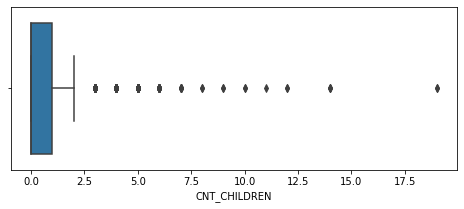

In [34]:
# Outler check for CNT_CHIDREN attribute.
'''The Boxplot depicts the number of children for a each client.
You can see that for a client having 19 children is an exceptional scenario. Hence, it is an Outier.
'''

plt.figure(figsize=[8,3])
sns.boxplot(app_data["CNT_CHILDREN"].astype("int64"))
plt.show()

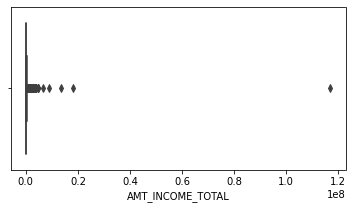

In [35]:
# Outlier check for AMT_INCOME_TOTAL column.
plt.figure(figsize=[6,3])
sns.boxplot(app_data["AMT_INCOME_TOTAL"])
plt.show()

In [36]:
# Reason for outlier for AMT_INCOME_TOTAL column.
'''Person is from Laborers occupation type and her target attribute is 1. Hence, its an outlier.'''

Outlier = app_data.iloc[[app_data["AMT_INCOME_TOTAL"].argmax()]]
Outlier.loc[:,["TARGET","CODE_GENDER","OCCUPATION_TYPE","AMT_CREDIT","AMT_INCOME_TOTAL"]]

,TARGET,CODE_GENDER,OCCUPATION_TYPE,AMT_CREDIT,AMT_INCOME_TOTAL
12840,1,F,Laborers,562491.0,117000000.0


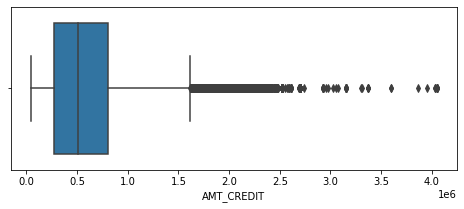

In [37]:
# Outlier check for AMY_CREDIT column.
plt.figure(figsize=[8,3])
sns.boxplot(app_data["AMT_CREDIT"])
plt.show()

In [38]:
# Reason for outlier for AMT_CREDIT column.
'''The amount credited is more than person's total income with significantly high than other values.'''

Outlier = app_data[app_data["AMT_CREDIT"]>3.5*1e6]
Outlier.loc[:,["TARGET","CODE_GENDER","OCCUPATION_TYPE","AMT_CREDIT","AMT_INCOME_TOTAL"]]

,TARGET,CODE_GENDER,OCCUPATION_TYPE,AMT_CREDIT,AMT_INCOME_TOTAL
14643,0,F,Managers,3956274.0,749331.0
14852,0,M,Managers,4050000.0,760846.5
17948,0,M,Managers,4050000.0,783000.0
53936,0,M,Managers,3600000.0,900450.0
95571,0,M,Managers,4031032.5,430650.0
104577,0,M,Secretaries,3600000.0,468000.0
110459,0,M,Managers,4050000.0,864900.0
119380,0,F,Managers,3860019.0,292050.0
119681,0,M,Managers,4050000.0,931365.0
120757,0,M,NaN,4050000.0,587250.0


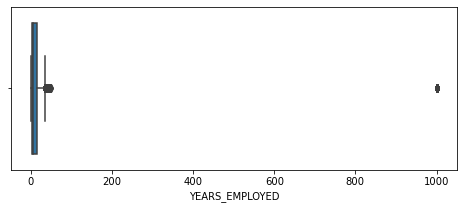

In [39]:
# Outlier check for YEARS_EMPLOYED column.
'''Before the application, person with 1000 years of work experience would be a reason for outlier.'''

plt.figure(figsize=[8,3])
sns.boxplot(app_data["YEARS_EMPLOYED"])
plt.show()

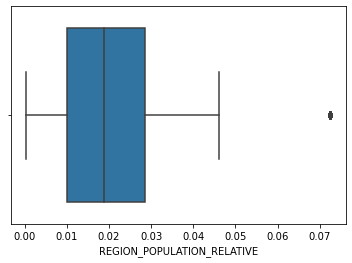

In [40]:
# Outlier check for REGION_POPULATION_RELATIVE column.
'''As the clients live in more populated region with highest normalized value(i.e; 0.72) is a cause for an outlier.'''

sns.boxplot(app_data["REGION_POPULATION_RELATIVE"])
plt.show()

<h3> Outlier Treatment </h3>

In [41]:
#Exclude values outside 99th percentile in each of the 3 variables.
app_data = app_data[app_data["CNT_CHILDREN"]    <np.nanpercentile(app_data["CNT_CHILDREN"], 100)]
app_data = app_data[app_data["YEARS_EMPLOYED"]  <np.nanpercentile(app_data["YEARS_EMPLOYED"], 99)]

### Binning of continious-variable

In [42]:
# Display prcentage over the plots.
def Percent(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.15
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [43]:
# Binning for AMT_INCOME_TOTAL(Income of client).
cateogry = ["Low", "Medium", "High", "Outstanding"]
app_data["INCOME"] = pd.qcut(app_data["AMT_INCOME_TOTAL"], q=[0,0.2,0.5,0.9,1], labels=cateogry)

Income %
High           33.864398
Low            29.037619
Medium         27.286176
Outstanding     9.811807
Name: INCOME, dtype: float64


<Figure size 432x288 with 0 Axes>

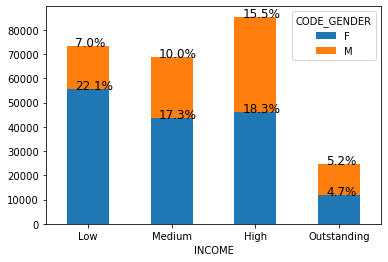

In [44]:
# Income distribution.
print("Income %")
print(app_data.INCOME.value_counts(normalize=True) *100)

# Visualize the Income attribute.
plt.figure(figsize=(6,4)) 
ax = pd.crosstab(app_data["INCOME"], app_data["CODE_GENDER"]).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
Percent(ax,app_data["INCOME"])
plt.show()

In [45]:
# Creating bins for Credit amount.
Bins  = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
Range = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data["AMT_CREDIT"], bins=Bins, labels=Range)

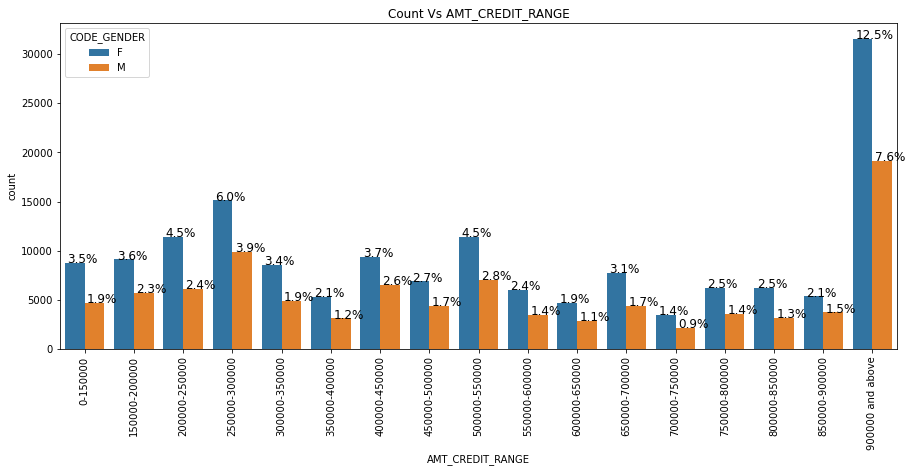

In [46]:
# Visualize columns AMT_CREDIT Range.
plt.figure(figsize=(15,6)) 
ax = sns.countplot(data=app_data, x="AMT_CREDIT_RANGE", hue="CODE_GENDER")
plt.xticks(rotation=90)
plt.title("Count Vs AMT_CREDIT_RANGE")
Percent(ax, app_data.AMT_CREDIT_RANGE)
plt.show()

In [47]:
# Sorting the index based on counts would be easy to categorise the popuation data.
app_data["REGION_POPULATION_RELATIVE"].value_counts().sort_index().head()

0.000290      1
0.000533     24
0.000938     21
0.001276    512
0.001333    206
Name: REGION_POPULATION_RELATIVE, dtype: int64

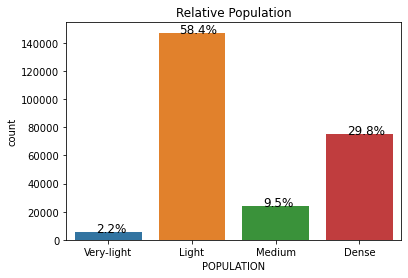

In [48]:
# Binning for Normalized Population into categories.
cateogry = ["Very-light", "Light", "Medium", "Dense"]
app_data["POPULATION"] = pd.qcut(app_data["REGION_POPULATION_RELATIVE"], q=[0,0.02,0.6,0.7,1], labels=cateogry)

# Visualize the Population column.
ax = sns.countplot(app_data["POPULATION"])
plt.title("Relative Population")
Percent(ax,app_data["POPULATION"])
plt.show()

### Check Imbalance

Dimension of Target0 = (230300, 49)
Dimension of Target1 = (21835, 49)
Ratio of 0 and 1 is 10.55


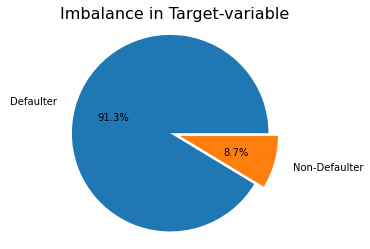

In [49]:
# Extract data with target value 0&1, storing it in new dataframe.
Target0 = app_data[app_data["TARGET"] == 0]
Target1 = app_data[app_data["TARGET"] == 1]

#Dimension of two new dataframes.
print(f"Dimension of Target0 = {Target0.shape}")
print(f"Dimension of Target1 = {Target1.shape}")

# Ratio of counts.
Imbalance = Target0.shape[0]/Target1.shape[0]
print(f"Ratio of 0 and 1 is {round(Imbalance,2)}")

# Visualize
pie, ax = plt.subplots()
labels = ["Defaulter","Non-Defaulter"]
explode = (0.1,0)
plt.pie([len(Target0),len(Target1)], autopct="%.1f%%", explode=explode, labels=labels, pctdistance=0.6, labeldistance=1.2)
ax.axis('equal')
plt.title("Imbalance in Target-variable", fontsize=16)
plt.show()
# pie.savefig("DeliveryPieChart.png")

<b>Inference:</b> We can see that from dataset of Application_data,Imbalance ratio is 11.4 .Target attribute has high imbalance with Defaulter of 8.1% as compared to Non-defualter with 91.9% For every target(target=1) there at atmost 11 counts of target (target=0).

<b> Correlation checks for DataFrames - Defaulters(Target=0) & Non-defaulters(Target=1).</b>

In [50]:
# Define a function to display the correlation using Heatmap.
def Corr(data,title):
    plt.figure(figsize=(20,12))
    sns.heatmap(Target0.corr(), annot=True, cmap="RdYlGn")
    plt.title(title, fontsize=16)
    plt.show()

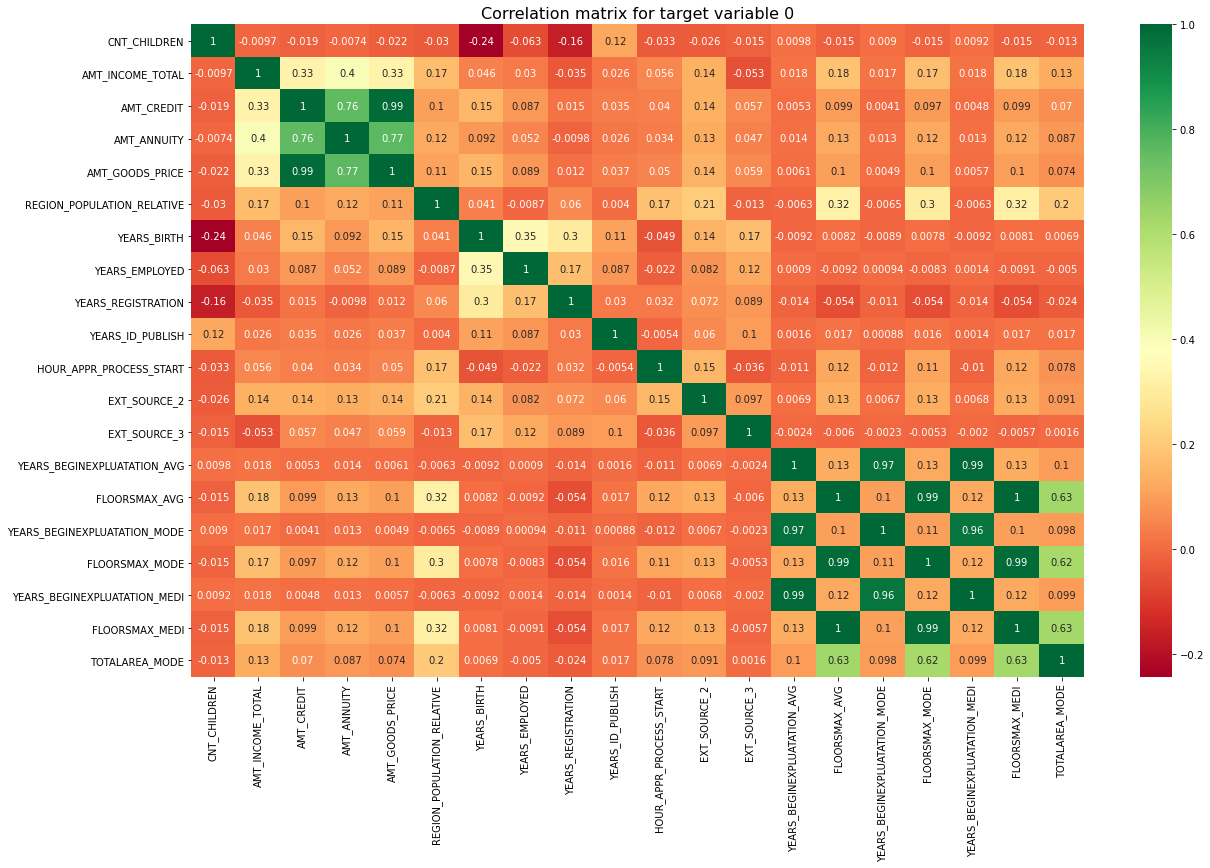

In [51]:
# For target variable=0
Corr(Target0,"Correlation matrix for target variable 0")

In [52]:
# Top 10 Hightly correlated variables for Target0 DataFrame.

Corr_matrix = Target0.corr()

#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
Top10_T0 = (Corr_matrix.where(np.triu(np.ones(Corr_matrix.shape), k=1).astype(np.bool)))
Top10_T0 = Top10_T0.unstack().reset_index().dropna().head(10)

# Names of the columns and data stored within it.
Top10_T0.columns = ["Attribute-1", "Attribute-2", "Correlation"]
Top10_T0["Corr_abs"] = abs(Top10_T0["Correlation"])
Top10_T0

,Attribute-1,Attribute-2,Correlation,Corr_abs
20,AMT_INCOME_TOTAL,CNT_CHILDREN,-0.009734,0.009734
40,AMT_CREDIT,CNT_CHILDREN,-0.018539,0.018539
41,AMT_CREDIT,AMT_INCOME_TOTAL,0.326153,0.326153
60,AMT_ANNUITY,CNT_CHILDREN,-0.007395,0.007395
61,AMT_ANNUITY,AMT_INCOME_TOTAL,0.400749,0.400749
62,AMT_ANNUITY,AMT_CREDIT,0.762101,0.762101
80,AMT_GOODS_PRICE,CNT_CHILDREN,-0.022134,0.022134
81,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333309,0.333309
82,AMT_GOODS_PRICE,AMT_CREDIT,0.986726,0.986726
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.766929,0.766929


<b>Inference:</b> As we can see from above correlation heatmap, There are number of observation we can point out -

1. Credit amount is inversely proportional to the Years of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. Client with less children located in densely populated area.

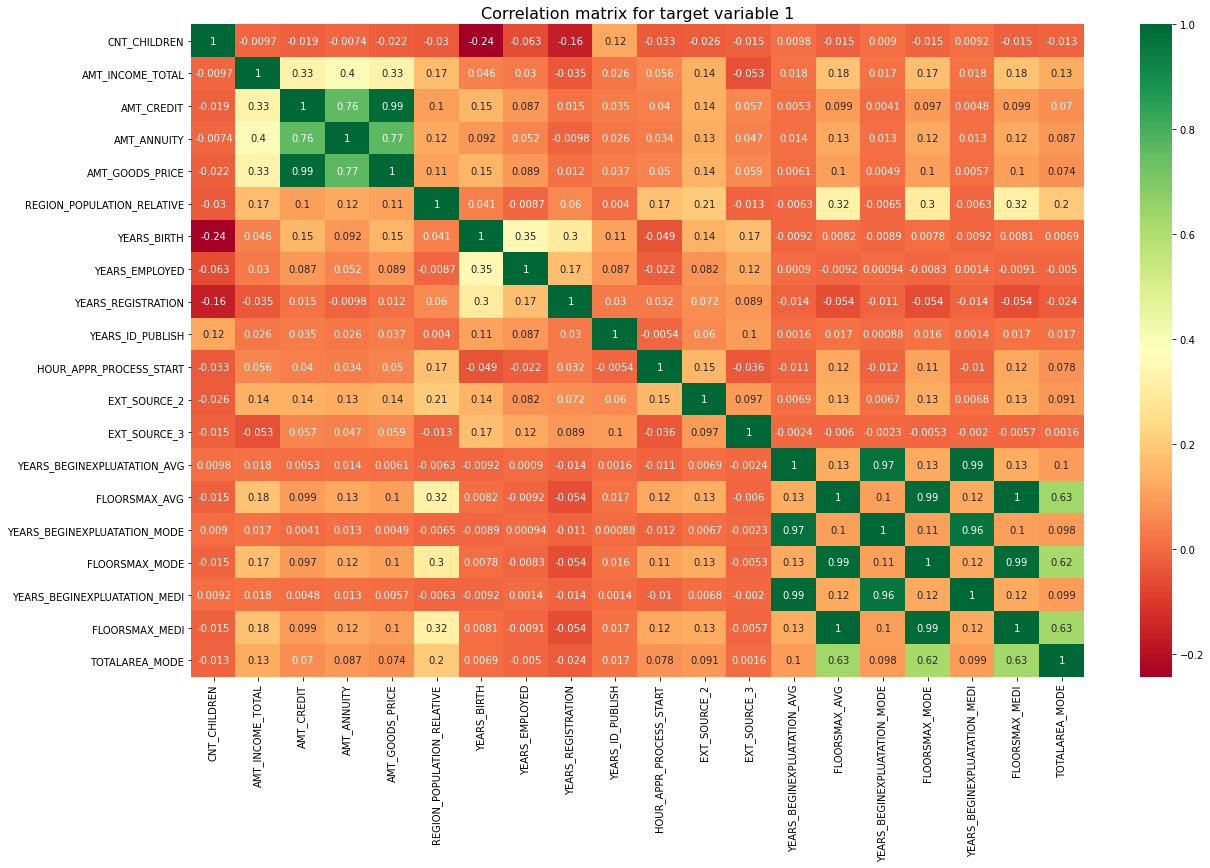

In [53]:
# For target variable=1
Corr(Target1,"Correlation matrix for target variable 1")

In [54]:
# Top 10 Hightly correlated variables for Target1 DataFrame.
Corr_matrix = Target1.corr()

#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
Top10_T1 = (Corr_matrix.where(np.triu(np.ones(Corr_matrix.shape), k=1).astype(np.bool)))
Top10_T1 = Top10_T1.unstack().reset_index().dropna().head(10)

# Define the names of the columns and store the top 10 values in dataframe "Top10_T1".
Top10_T1.columns = ["Attribute-1", "Attribute-2", "Correlation"]
Top10_T1["Corr_abs"] = abs(Top10_T1["Correlation"])
Top10_T1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
Top10_T1

,Attribute-1,Attribute-2,Correlation,Corr_abs
82,AMT_GOODS_PRICE,AMT_CREDIT,0.982799,0.982799
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.749379,0.749379
62,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708
61,AMT_ANNUITY,AMT_INCOME_TOTAL,0.043358,0.043358
41,AMT_CREDIT,AMT_INCOME_TOTAL,0.036484,0.036484
81,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.036097,0.036097
60,AMT_ANNUITY,CNT_CHILDREN,0.015653,0.015653
80,AMT_GOODS_PRICE,CNT_CHILDREN,-0.007711,0.007711
40,AMT_CREDIT,CNT_CHILDREN,-0.002074,0.002074
20,AMT_INCOME_TOTAL,CNT_CHILDREN,0.001872,0.001872


<b>Inference:</b>This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

In [55]:
# Display the Top3 HIGHLY-correlated attributes from dataframes- 1.Target=0 and 2.Target=1.
display(Top10_T0.head(3), Top10_T1.head(3))

,Attribute-1,Attribute-2,Correlation,Corr_abs
20,AMT_INCOME_TOTAL,CNT_CHILDREN,-0.009734,0.009734
40,AMT_CREDIT,CNT_CHILDREN,-0.018539,0.018539
41,AMT_CREDIT,AMT_INCOME_TOTAL,0.326153,0.326153


,Attribute-1,Attribute-2,Correlation,Corr_abs
82,AMT_GOODS_PRICE,AMT_CREDIT,0.982799,0.982799
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.749379,0.749379
62,AMT_ANNUITY,AMT_CREDIT,0.748708,0.748708


<b>Inference:</b> The top 3 correlation attributes are same for defaulters and Non-defaulters.

## Univariate Analysis

In [56]:
def Univariate(variable, fig, r):
    if app_data[variable].dtypes == "int64" or app_data[variable].dtypes == "float64":
            
            sns.set_style('whitegrid')
            fig, (ax0,ax1) = plt.subplots(1,2,figsize= fig,sharey=True,sharex=True)
            
            ax0 = sns.distplot(Target0[variable].dropna(),kde=True, ax=ax0)
            ax1 = sns.distplot(Target1[variable].dropna(),kde=True, ax=ax1)
            #Annotation
            ax0.title.set_text("Distribution for Non-Defaulters")
            ax1.title.set_text("Distribution for Defaulters")
            ax0.tick_params(labelrotation= r)
            ax1.tick_params(labelrotation= r)
            plt.show()
            
    elif app_data[variable].dtypes == "category":
        
            fig, (ax0,ax1) = plt.subplots(1,2,figsize=fig)
            
            ax0 = sns.countplot(Target0[variable], ax=ax0)
            ax1 = sns.countplot(Target1[variable], ax=ax1)
            #Annotation
            ax0.title.set_text("Distribution for Non-Defaulters")
            ax1.title.set_text("Distribution for Defaulters")
            plt.setp(ax0.xaxis.get_majorticklabels(), rotation=r)
            plt.setp(ax1.xaxis.get_majorticklabels(), rotation=r)
            plt.show()
            #show the percentage of unique values.
            print(Target0[variable].value_counts(normalize=100) *100)
            print(Target1[variable].value_counts(normalize=100) *100)

<!--  --><b>Univariate Analysis on continuous variables</b>

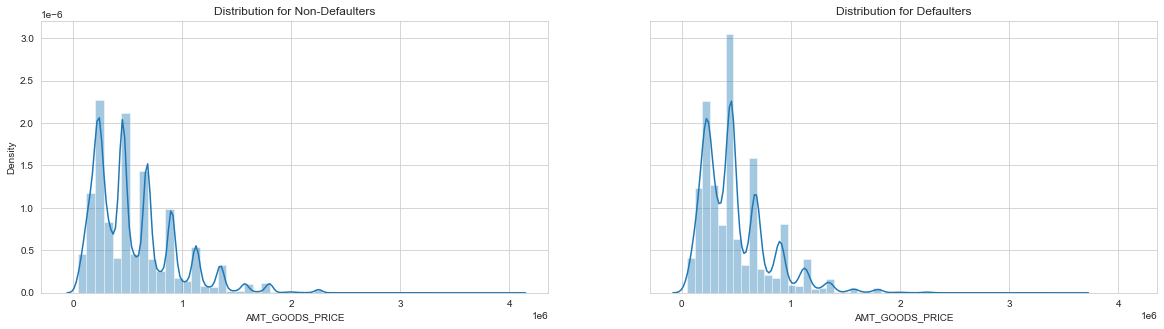

In [57]:
# Trend checks for consumer loans, it is the price of the goods for which the loan is given.
Univariate("AMT_GOODS_PRICE", fig=[20,5], r=0)

<b>Inference:</b> 
Defaulters purchases or loan credited is high in range of 0 to 50,000.

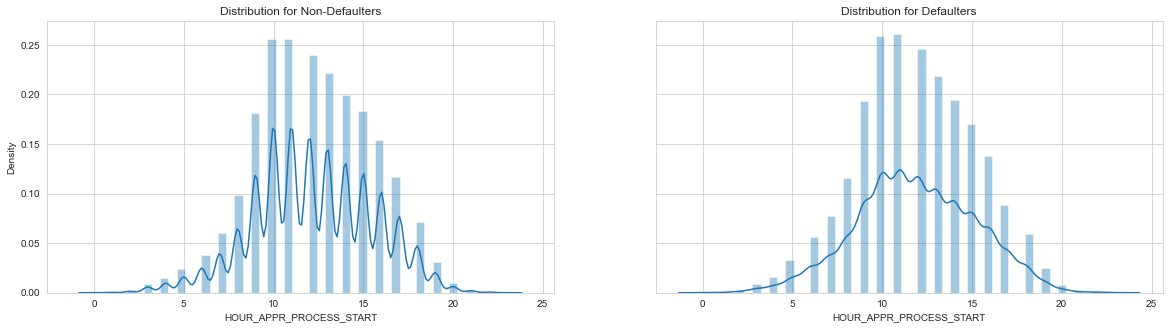

In [58]:
# Analysis based on application starting time(inHRS).
Univariate("HOUR_APPR_PROCESS_START", fig=[20,5], r=0)

<b> Inference: </b> In peak-time(10AM - 12:30PM),many defaulters prefer this timing for loan application.

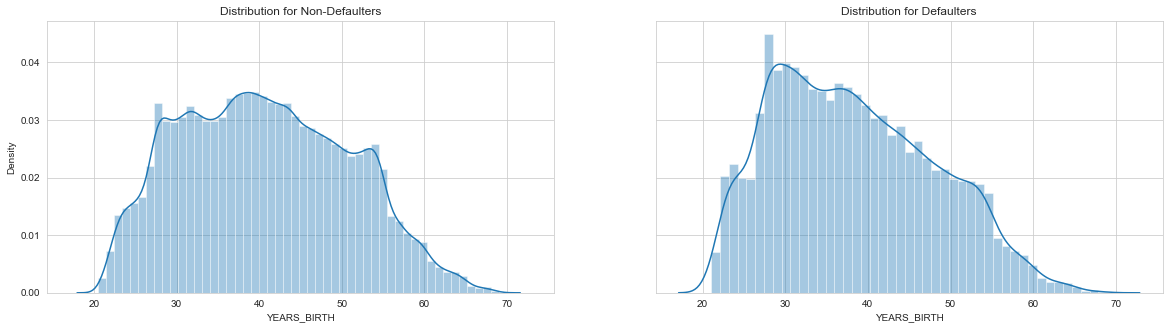

In [59]:
# Analysis based on birth in years.
Univariate("YEARS_BIRTH", fig=[20,5], r=0)

<b>Inference:</b> From the distributed plot, we can note that customer without payment difficulties having year in between 34 to 54 years , And customer with payment difficulties having in between 31 to 50 years.

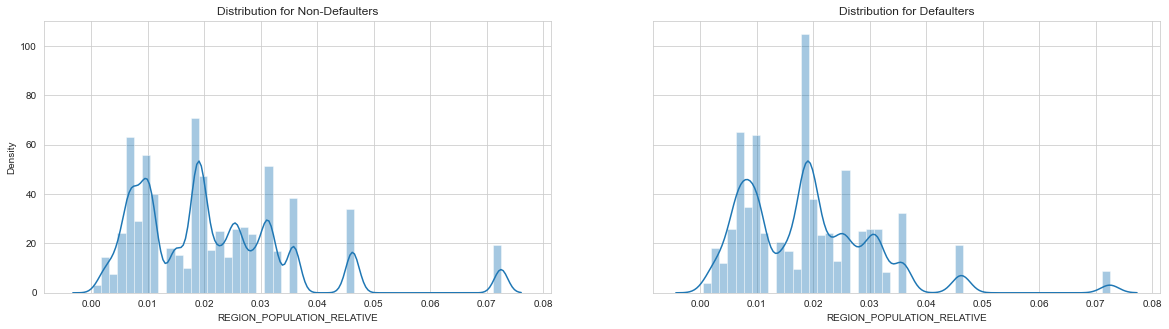

In [60]:
# Analysis based on Relative population.
Univariate("REGION_POPULATION_RELATIVE", fig=[20,5], r=0)

<b> Inference: </b> People living in higher density areas having least defaulters.

<b>Univariate Analysis on Categorical-variable(unordered).</b>

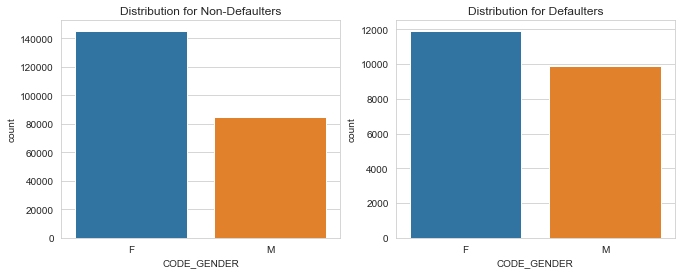

F    63.073383
M    36.926617
Name: CODE_GENDER, dtype: float64
F    54.595832
M    45.404168
Name: CODE_GENDER, dtype: float64


In [61]:
# Analysis based on Gender.
Univariate("CODE_GENDER", fig=[11,4], r=0)

<b>Inference:</b> Both follow same pattern, so cannot decide much on basis of gender as defaulters and non defaulters.

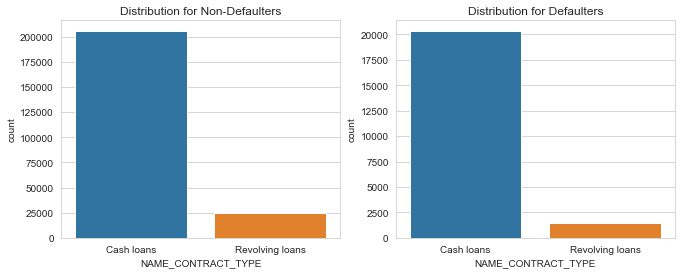

Cash loans         89.383847
Revolving loans    10.616153
Name: NAME_CONTRACT_TYPE, dtype: float64
Cash loans         93.295168
Revolving loans     6.704832
Name: NAME_CONTRACT_TYPE, dtype: float64


In [62]:
# Analysis whether the loan is cash or revolving.
Univariate("NAME_CONTRACT_TYPE", fig=[11,4], r=0)

<b>Inference:</b> Many customers took cash loans.

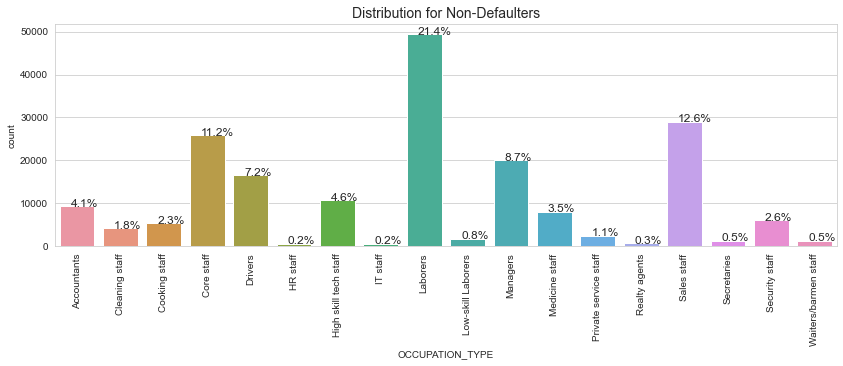

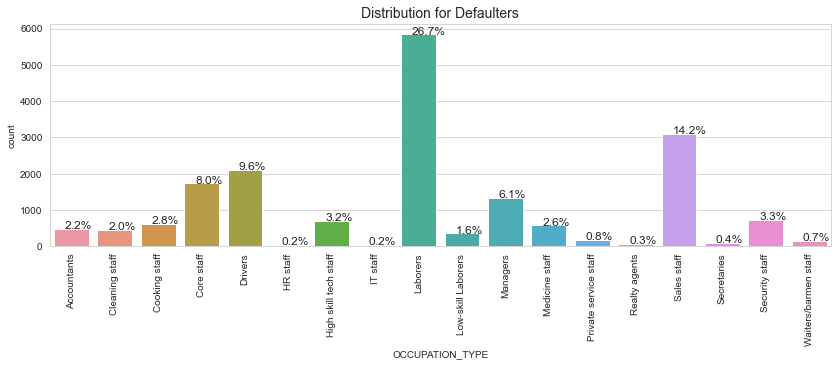

In [63]:
# Univariate("OCCUPATION_TYPE")
 
plt.figure(figsize=[14,9])
plt.subplot(2, 1, 1)
ax = sns.countplot(x = Target0["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.title("Distribution for Non-Defaulters", fontsize=14)
Percent(ax,Target0["OCCUPATION_TYPE"])

plt.figure(figsize=[14,9])
plt.subplot(2, 1, 2)
ax = sns.countplot(x = Target1["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.title("Distribution for Defaulters", fontsize=14)
Percent(ax,Target1["OCCUPATION_TYPE"]) 
plt.show()

<b>Inference:</b> About 26.7% of Labours are having payment difficulties.

<b>Univariate Analysis on Categorical-variable(ordered).</b>

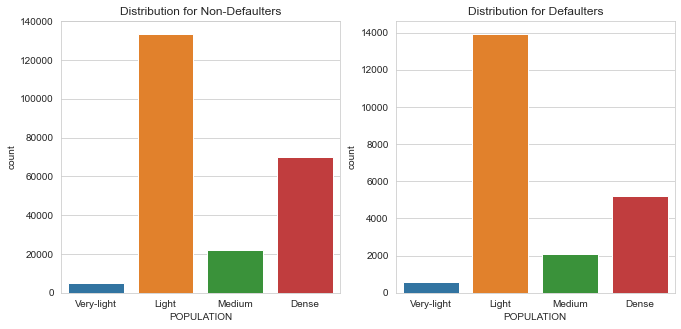

Light         57.916630
Dense         30.399913
Medium         9.502822
Very-light     2.180634
Name: POPULATION, dtype: float64
Light         63.782917
Dense         23.915732
Medium         9.580948
Very-light     2.720403
Name: POPULATION, dtype: float64


In [64]:
# Analysis based on grouped-population.
Univariate("POPULATION", fig=[11,5], r=0)

<b>Inference:</b> From both the cases, customers from moderately populated region are more likey able to manage income and payback their loans.

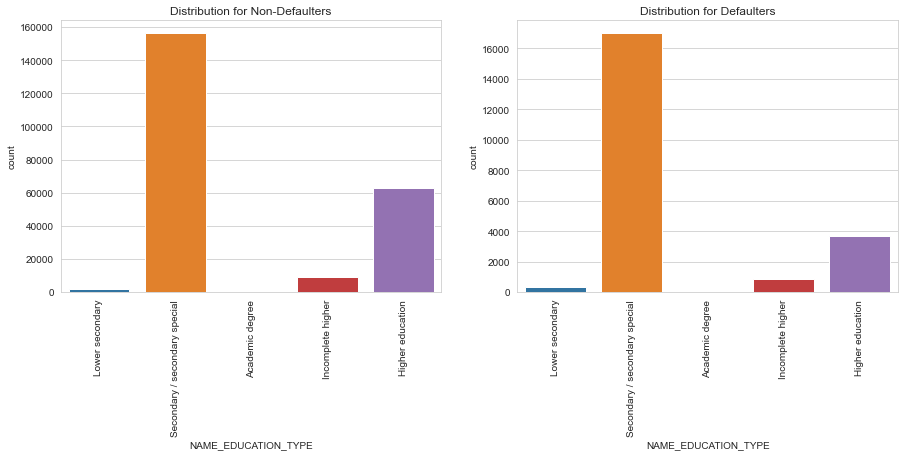

Secondary / secondary special    67.861485
Higher education                 27.355189
Incomplete higher                 3.868432
Lower secondary                   0.856274
Academic degree                   0.058619
Name: NAME_EDUCATION_TYPE, dtype: float64
Secondary / secondary special    77.856652
Higher education                 16.803297
Incomplete higher                 3.883673
Lower secondary                   1.442638
Academic degree                   0.013739
Name: NAME_EDUCATION_TYPE, dtype: float64


In [65]:
# Analysis based on Type of education.
Univariate("NAME_EDUCATION_TYPE", fig=[15,5], r=90)

<b>Inference:</b>  In both the cases, clients are having payment difficulties in secondary/ secondary special category.

## Bivariate Analysis

In [66]:
# Create a function
def data_type(variable):
    if app_data[variable].dtypes == "int" or app_data[variable].dtypes == "float":
        return "numerical"
    elif app_data[variable].dtypes == "category":
        return "categorical"
    
def bivariate(var1,var2,r):
    if data_type(var1) == "numerical" and data_type(var2) == "numerical":
        
        sns.set_style('whitegrid')
        fig, (ax0,ax1) = plt.subplots(1,2,figsize=[14,4],sharey=True)
        ax0 = sns.regplot(var1,var2, Target0, ax=ax0)
        ax1 = sns.regplot(var1,var2, Target1, ax=ax1)
        # Annotation
        ax0.title.set_text("Distribution for Non-Defaulters")
        ax1.title.set_text("Distribution for Defaulters")
        plt.xticks(rotation = r)
        plt.show()
        
    elif (data_type(var1) == "categorical" and data_type(var2) == "numerical") or (data_type(var1) == "numerical" and data_type(var2) == "categorical"):
        
        fig, (ax0,ax1) = plt.subplots(1,2,figsize=[15,5],sharey=True)
        ax0 = sns.barplot(Target0[var1],Target0[var2],hue=Target0["CODE_GENDER"], ax=ax0)
        ax1 = sns.barplot(Target1[var1],Target1[var2],hue=Target1["CODE_GENDER"], ax=ax1)
        # Annotation
        ax0.title.set_text("Distribution for Non-Defaulters")
        ax1.title.set_text("Distribution for Defaulters")
        plt.setp(ax0.xaxis.get_majorticklabels(), rotation=r)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=r)      
        plt.show()
    
    else: 
        fig, (ax0,ax1) = plt.subplots(2,1,figsize=[15,10],sharex=True)
        ax0 = sns.countplot(Target0[var1],hue=Target0[var2], ax=ax0)
        ax1 = sns.countplot(Target1[var1],hue=Target1[var2], ax=ax1)
        # Annotation
        ax0.title.set_text("Distribution for Non-Defaulters")
        ax1.title.set_text("Distribution for Defaulters")
        plt.setp(ax0.xaxis.get_majorticklabels(), rotation=r)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=r)   
        plt.show()

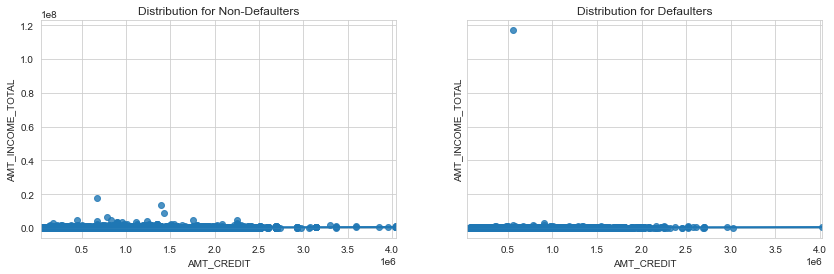

In [67]:
# Analysis on Income of the client and amount credited.
bivariate("AMT_CREDIT","AMT_INCOME_TOTAL", r=0)

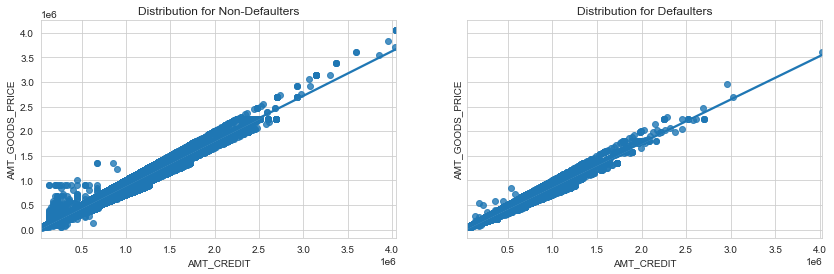

In [68]:
# Analysis on Price of the good and credited amount.
bivariate("AMT_CREDIT","AMT_GOODS_PRICE", r=0)

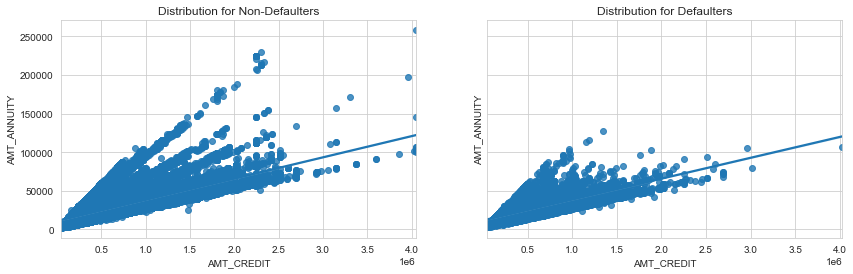

In [69]:
# Analysis on Credited amount and annuity amount.
bivariate("AMT_CREDIT","AMT_ANNUITY", r=0)

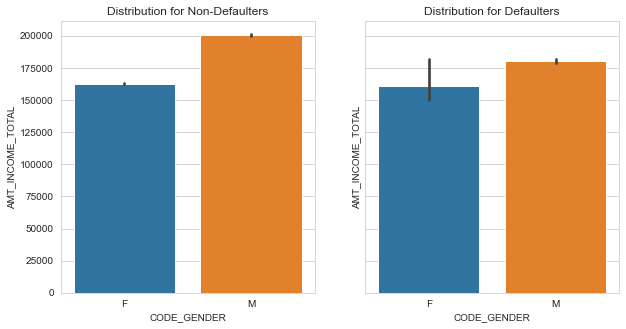

In [70]:
# Analysis on Total income of the clients and gender.
fig, (ax0,ax1) = plt.subplots(1,2,figsize=[10,5],sharey=True)
ax0 = sns.barplot(Target0["CODE_GENDER"],Target0["AMT_INCOME_TOTAL"], ax=ax0)
ax1 = sns.barplot(Target1["CODE_GENDER"],Target1["AMT_INCOME_TOTAL"], ax=ax1)
# Annotation
ax0.title.set_text("Distribution for Non-Defaulters")
ax1.title.set_text("Distribution for Defaulters")
plt.setp(ax0.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)      
plt.show()    

<b>Inference:</b> On an average male defaulters do have less income compared to non-defaulters.

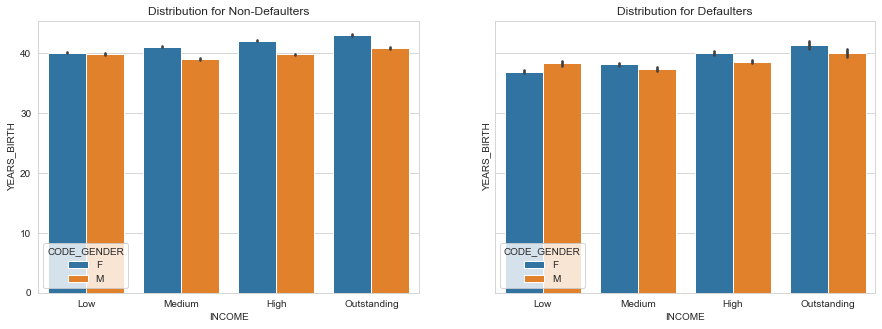

In [71]:
# Analysis on categorised income and age.
bivariate("INCOME","YEARS_BIRTH", r=0)

<b>Inference:</b> We can observe that, there are more number of male defaulters with low income and all male defaulters have age around 38-42.

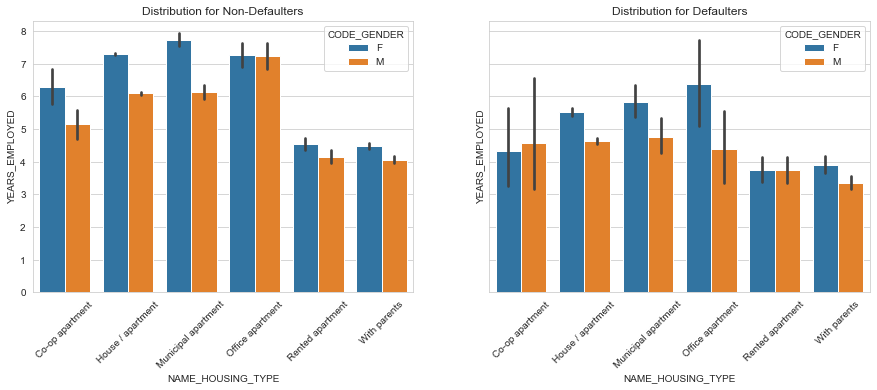

In [72]:
# Analysis on Years of experience and housing of the client.
bivariate("NAME_HOUSING_TYPE","YEARS_EMPLOYED", r=45)

<b>Inference:</b> Defaulters prefers to say in Municipal apartment, where as Non-defaulters prefers to stay in House/Apartment.

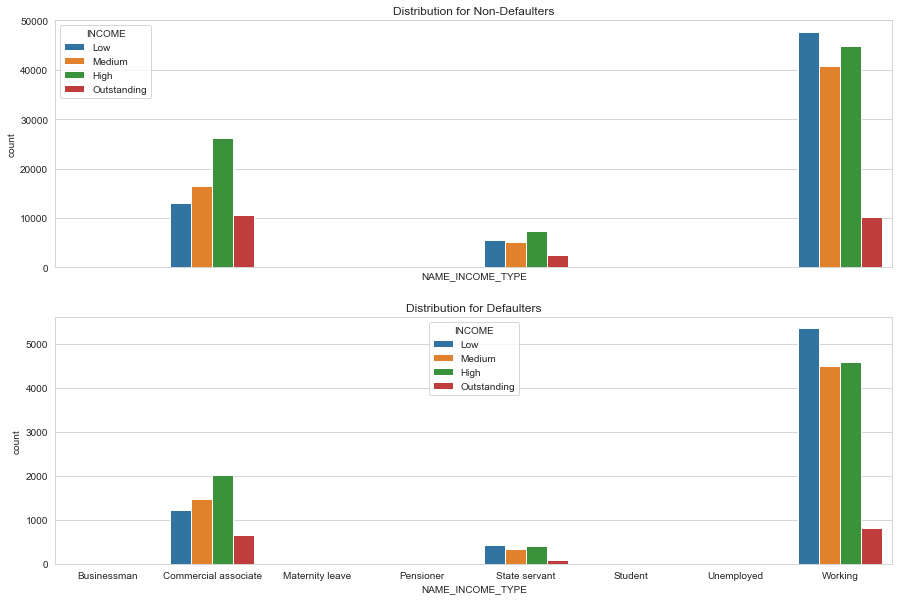

In [73]:
# Analysis on Clients income type Vs job title.
bivariate("NAME_INCOME_TYPE","INCOME", r=0)

<b>Inference:</b> Working Professionals are more likely to br placed in defaulters as well as Non-defaulters. Hence, with the help of this we can't decide the defaulters.

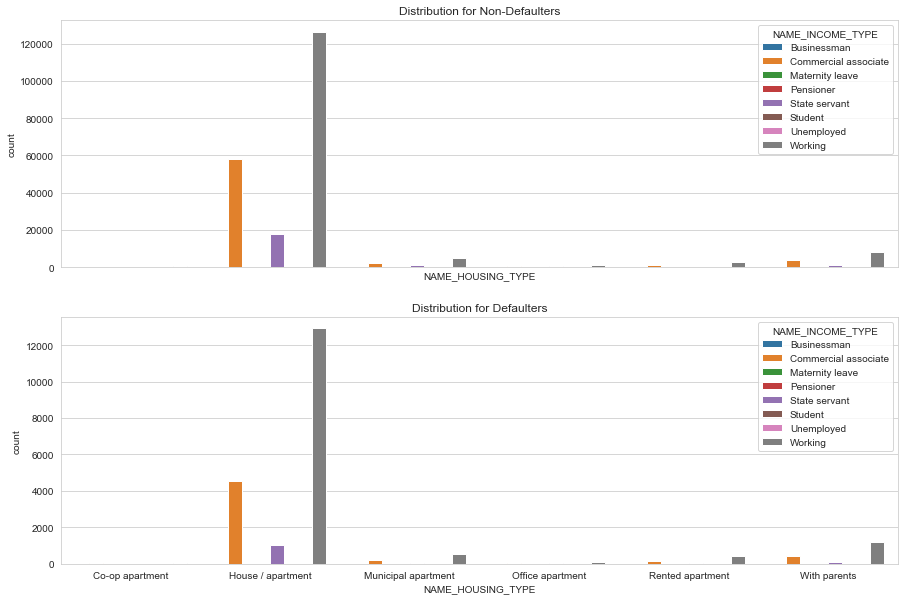

In [74]:
# Analysis on housing of the client and Clients income type.
bivariate("NAME_HOUSING_TYPE","NAME_INCOME_TYPE", r=0)

<b>Inference:</b> Loan defaulters prefers to stay in House/Appartment.

<h4>Read Previous application dataset.</h4>

In [75]:
prev_data = pd.read_csv("previous_application.csv")

In [76]:
prev_data.shape

(1670214, 37)

In [77]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [78]:
# Percentage of Null-values.
Null_prevdata = (prev_data.isnull().sum()/prev_data.shape[0]) * 100

# Convert columns to a List.
Null_cols = list((Null_prevdata[Null_prevdata.values > 50]).index)

# Drop the Unwanted columns from the DataFrame.
prev_data.drop(Null_cols, axis=1, inplace=True)

In [79]:
# Percentage of missing-values.
(prev_data.isnull().sum() / prev_data.shape[0] * 100).sort_values(ascending=False)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DUE                 40.298129
DAYS_TERMINATION               40.298129
DAYS_FIRST_DRAWING             40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE

In [80]:
# Impute the missing values for column PRODUCT_COMBINATION with its mode.

mode = prev_data["PRODUCT_COMBINATION"].value_counts().mode()[0]
print("mean of PRODUCT_COMBINATION = ",mode)

prev_data["PRODUCT_COMBINATION"].fillna(mode, inplace=True)

mean of PRODUCT_COMBINATION =  2555


<b> Check the datatype </b>

In [81]:
'''SK_ID_PREV & SK_ID_CURR - represents the ID of the loan. 
Hence, it can't be int datatype and is to converted into object datatype.'''
prev_data["SK_ID_PREV"] = prev_data["SK_ID_PREV"].astype("object")
prev_data["SK_ID_CURR"] = prev_data["SK_ID_CURR"].astype("object")

### Merge data

In [82]:
data = pd.merge(left=prev_data, right=app_data, how='inner', on='SK_ID_CURR', suffixes='_x')

In [83]:
# Rename the columns.
data = data.rename({"NAME_CONTRACT_TYPEx":"NAME_CONTRACT_TYPE_PREV", "AMT_CREDITx":"AMT_CREDIT_PREV",
                    "NAME_CONTRACT_TYPE_":"NAME_CONTRACT_TYPE", "AMT_CREDIT_":"AMT_CREDIT",
                    "AMT_ANNUITY_":"AMT_ANNUITY", "AMT_ANNUITYx":"AMT_ANNUITY_PREV",
                    "WEEKDAY_APPR_PROCESS_STARTx":"WEEKDAY_APPR_PROCESS_START_PREV",
                    "WEEKDAY_APPR_PROCESS_START_":"WEEKDAY_APPR_PROCESS_START", 
                    "HOUR_APPR_PROCESS_START_":"HOUR_APPR_PROCESS_START",
                    "HOUR_APPR_PROCESS_STARTx":"HOUR_APPR_PROCESS_START_PREV"}, axis=1)

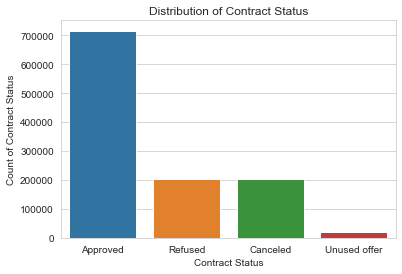

In [84]:
# plotting the Contract Status.
sns.countplot(data["NAME_CONTRACT_STATUS"])
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [85]:
# Creating seperate DataFrame for further analysis of loan.

Approved = data[data["NAME_CONTRACT_STATUS"] == "Approved"]
Refused  = data[data["NAME_CONTRACT_STATUS"] == "Refused"]
Canceled = data[data["NAME_CONTRACT_STATUS"] == "Canceled"]
Unused   = data[data["NAME_CONTRACT_STATUS"] == "Unused offer"]

### Plot a Graph for Contract Status attribute.

In [86]:
def Status(var,r):
    
    sns.set_style('whitegrid')
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10), sharex="all", sharey="all")
#     fig.tight_layout(pad=10.0) 
    
    ax0 = sns.countplot(Approved[var],order= Approved[var].value_counts().index, ax=ax0)
    ax0.set_title("Approved")
    ax0.set_ylabel("Count of Loans")
    plt.setp(ax0.xaxis.get_majorticklabels(), rotation=r)
       
    ax1 = sns.countplot(Refused[var],order= Refused[var].value_counts().index, ax=ax1)
    ax1.set_title("Refused")
    ax1.set_ylabel("Count of Loans")
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=r)
    
    
    ax2 = sns.countplot(Canceled[var],order= Canceled[var].value_counts().index, ax=ax2)
    ax2.set_title("Canceled")
    ax2.set_ylabel("Count of Loans")
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=r)
    
    ax3 = sns.countplot(Unused[var],order= Unused[var].value_counts().index, ax=ax3)
    ax3.set_title("Unused Offer")
    ax3.set_ylabel("Count of Loans")
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=r)
    
    plt.show()

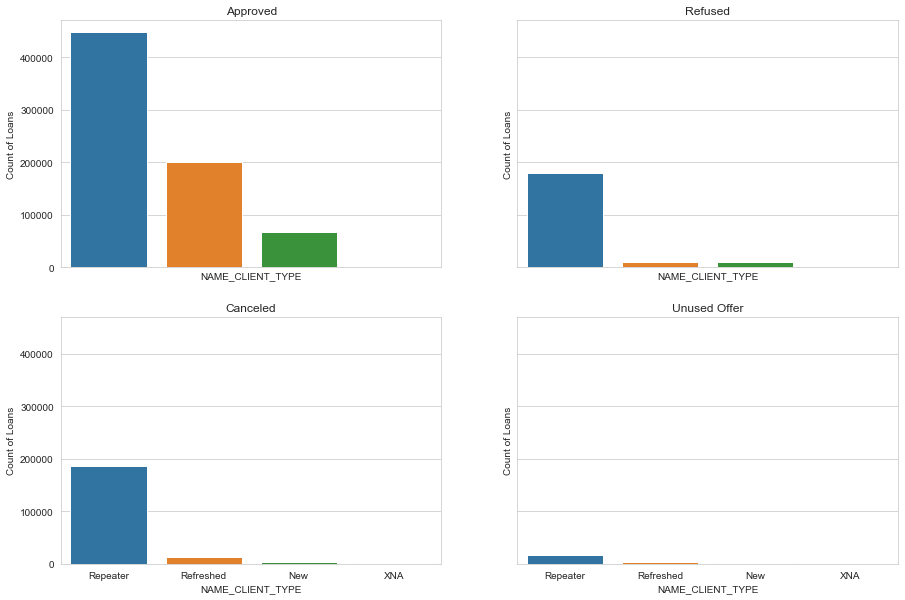

In [87]:
Status("NAME_CLIENT_TYPE", r=0)

<b>Inference:</b> Here we can see that the Repeater is getting more Refused but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused

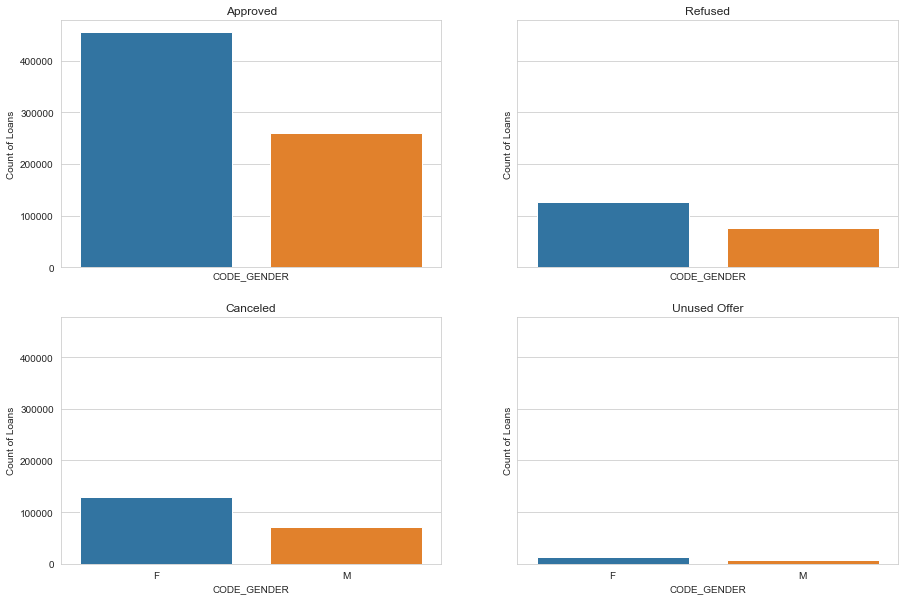

In [88]:
Status("CODE_GENDER", r=0)

<b>Inference:</b> Here we can see that Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category

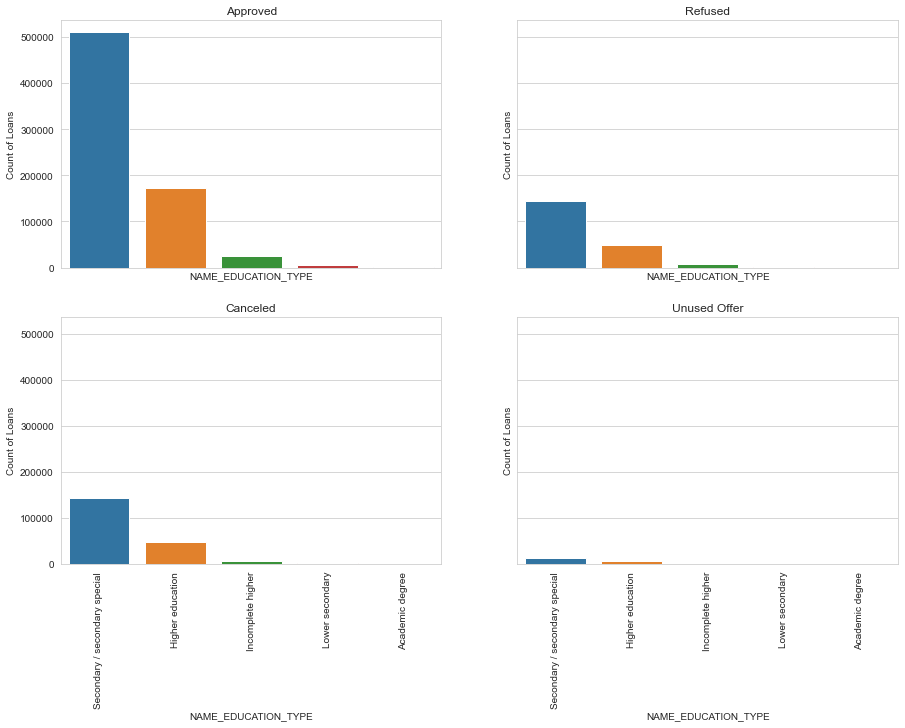

In [89]:
Status("NAME_EDUCATION_TYPE", r=90)

<b>Inference:</b> Here we can see that Secondary/ Secondary special is more effective in every case

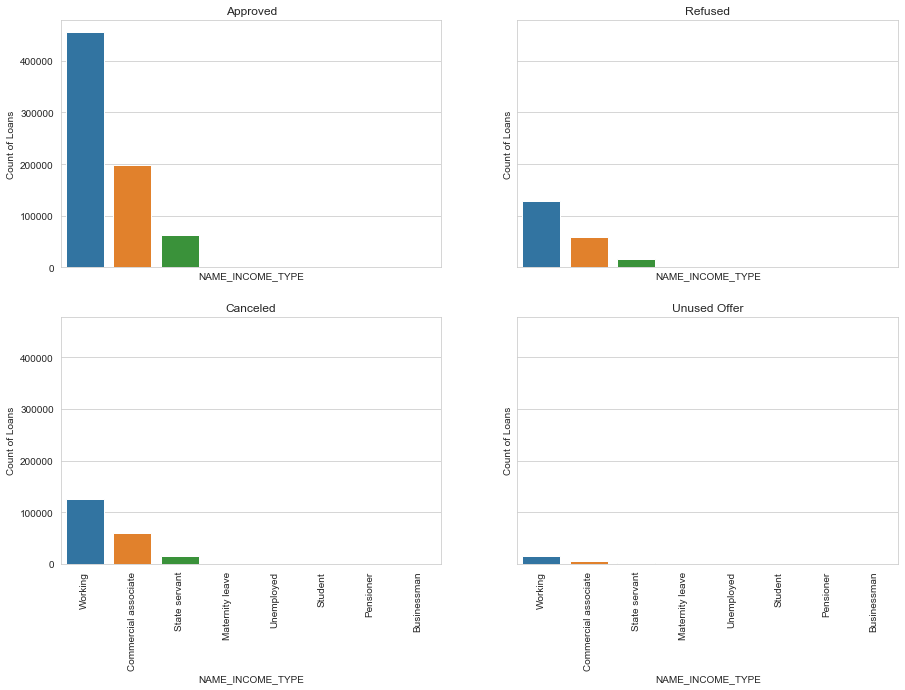

In [90]:
Status("NAME_INCOME_TYPE", r=90)

<b>Inference:</b> Here we can see that the working type people are applying more loans as compare to others and also Commercial associates people are taking more loans.

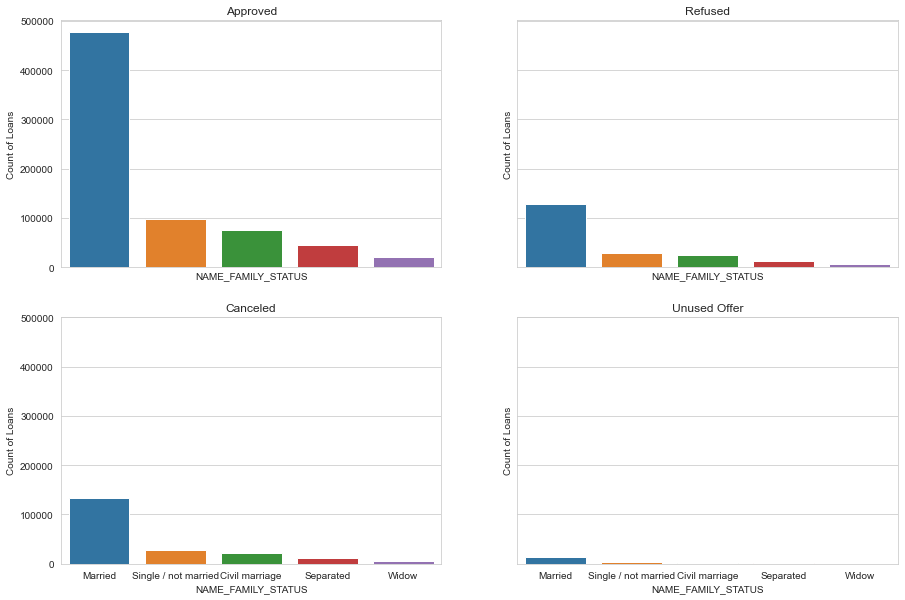

In [91]:
Status("NAME_FAMILY_STATUS", r=0)

<b>Inference:</b> Here we can see that the Married people are applying and taking loans more than the others.

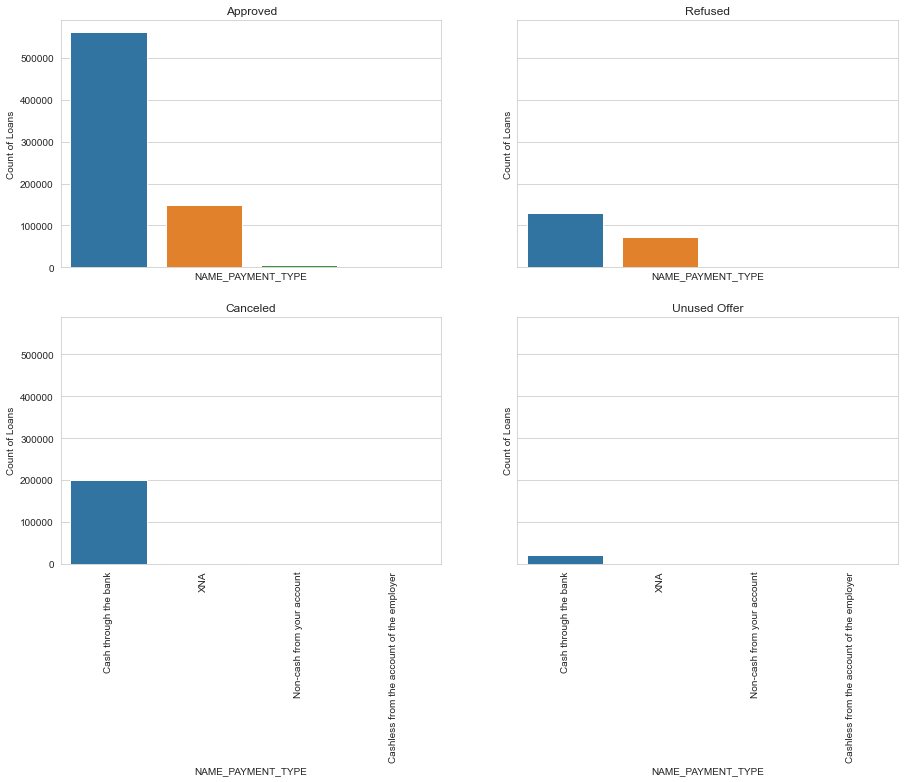

In [92]:
Status("NAME_PAYMENT_TYPE" , r=90)

<b>Inference:</b> Here we can see that the people are taking more loan in format of cash through the bank

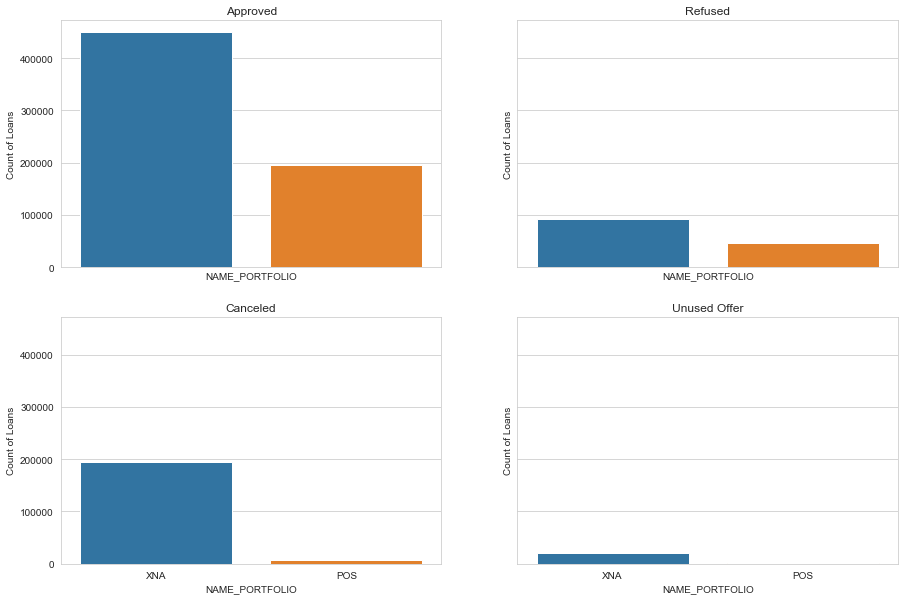

In [93]:
Status("NAME_PORTFOLIO", r=0)

<b>Inference:</b> Here most approved loan were through POS and Most refused loans were in cash.

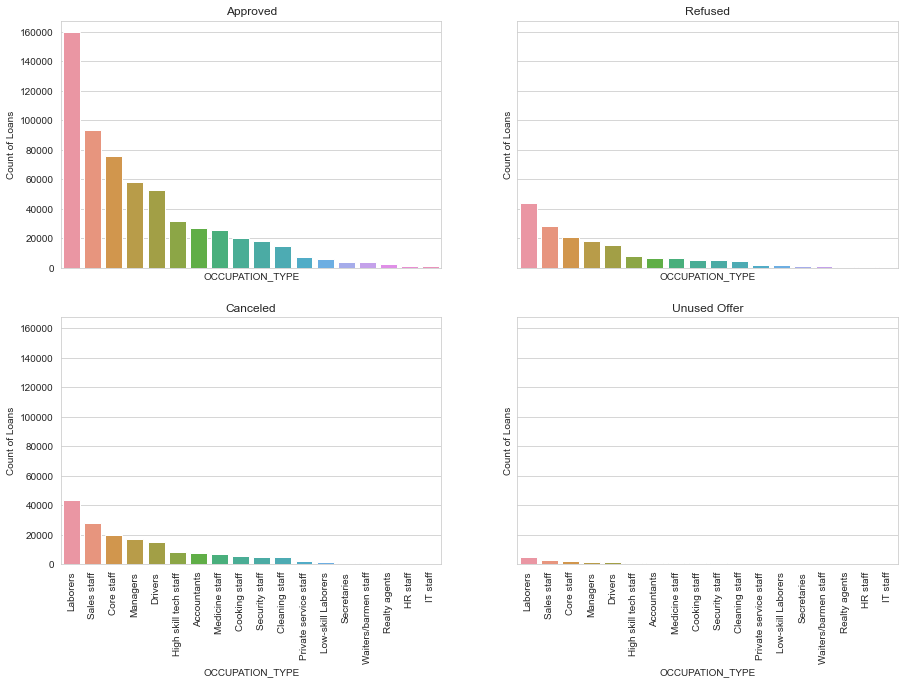

In [94]:
Status("OCCUPATION_TYPE", r=90)

<b>Inference:</b> Here laborers are getting most refused and most approved loans. And aslo Sales staff is also getting the second most refused and approved loans.

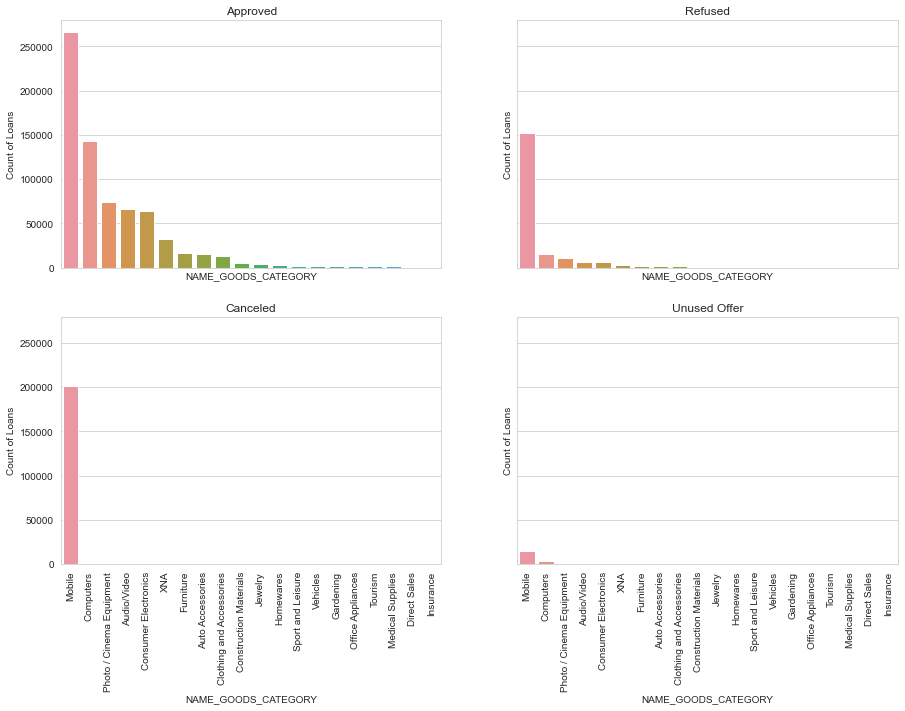

In [95]:
Status("NAME_GOODS_CATEGORY", r=90)

<b>Inference:</b> Here Most Refused loan is of Mobile and most approved loan is Mobile

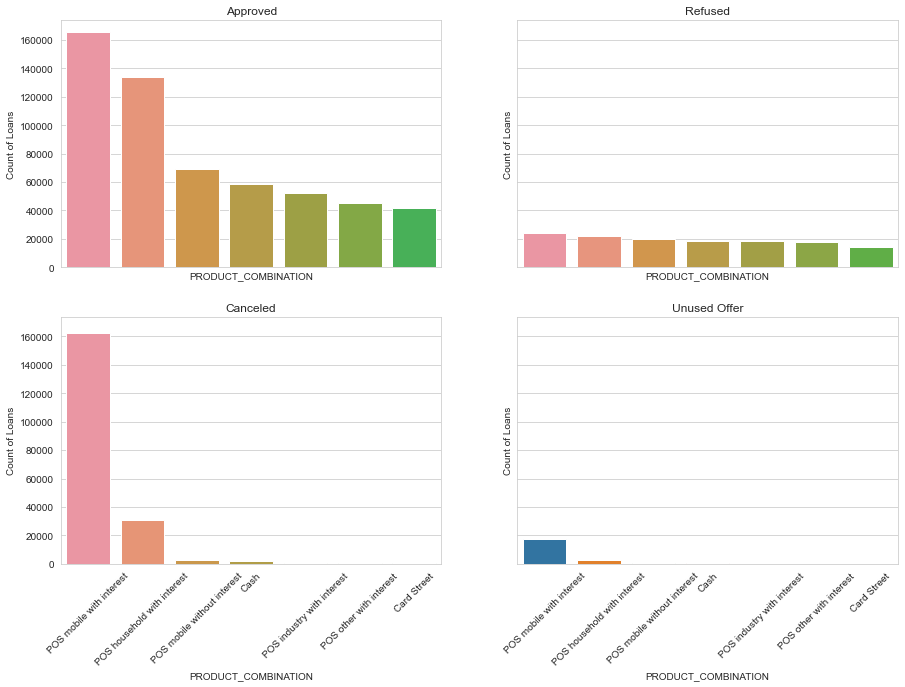

In [96]:
Status("PRODUCT_COMBINATION", r=45)

<b>Inference:</b> The most accepting loan is Cash X-sell: low And most canceled loan is Cash and Most Unused loan is POS mobile with interest.

## Conclusion

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
3. ‘Revolving Loans’ in ‘NAME_CONTRACT_TYPE’ has maximum percentage of payment difficulties. Hence, client with contract type as ‘Revolving loans’ in previous application are the driving factors for Loan Defaulters.
4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
5. Banks should focus more on new applicants those who belong to IT staff, Accountants, Medicine Staff or Private Service Staff group since the loan statuses(approved, refused, cancelled) are stable for such groups.